In [146]:
import random
import time
import matplotlib.pyplot as plt

def sampling_list(num):
    #{A,C,G,T}를 랜덤하게 넣는다.
    #랜덤으로 넣을 시, n값이 랜덤하게 정해지며 sequences X와 Y또한 랜덤하게 생성된다.
    Eng_list = ['A', 'C', 'G', 'T']
    sample_list = []
    for i in range(num):
        sample_list.append(random.choice(Eng_list))
    return sample_list

#X와 Y의 length는 둘 다 n이다.
def LCS_Length(X, Y):

    #len(X) == len(Y) == n

    n = len(X)
    #LCS값을 저장할 C 테이블을 생성한다.
    C = [[0 for x in range(n+1)] for y in range(n+1)]

    for i in range(1, n+1):
        for j in range(1, n+1):
            if X[i-1] == Y[j-1]:
                C[i][j] = C[i-1][j-1] + 1
                
            #CLRS의 의사코드 elseif와 else를 max로 묶어서 할당하도록 하였다.
            else:
                C[i][j] = max(C[i-1][j], C[i][j-1])

    #C 표를 출력하는 것이 output이 아닌, C에 저장되어 있는 LCS값이 output이므로 인덱스를 지정하여 출력하도록 한다.
    return C[n][n]

#plot를 그리는 함수를 지정하였다.
def plotting(x, y):
    x.sort()
    y.sort()
    plt.plot(x,y,'bo-.')
    plt.xlabel('n')
    plt.ylabel('running time')
    plt.title('Average actual running time with various values of n')
    plt.show()
    
#average_runtime을 구하기 위하여 세 가지 단계를 지정하였다.
#n값이 10부터 99사이일 때 low로, 100부터 499까지 medium으로, 500부터 1000까지 high로 지정하였다.
def runtime():
    main_go()

    if rand_elem >= 10 and rand_elem < 100:
        X_average_low.append(rand_elem)
        Y_average_low.append(end)
    elif rand_elem >= 100 and rand_elem < 500:
        X_average_medium.append(rand_elem)
        Y_average_medium.append(end)
    else:
        X_average_high.append(rand_elem)
        Y_average_high.append(end)

#n이 low, medium, high일 때를 나눠서 n값과 running time을 평균내었다.
def average_runtime():
    global X_low, X_medium, X_high, Y_low, Y_medium, Y_high
    X_low, X_medium, X_high, Y_low, Y_medium, Y_high = 0, 0, 0, 0, 0, 0
    
    for ix in range(len(X_average_low)):
        X_low += X_average_low[ix]
    for jx in range(len(X_average_medium)):
        X_medium += X_average_medium[jx]
    for kx in range(len(X_average_high)):
        X_high += X_average_high[kx]
        
    for iy in range(len(Y_average_low)):
        Y_low += Y_average_low[iy]
    for jy in range(len(Y_average_medium)):
        Y_medium += Y_average_medium[jy]
    for ky in range(len(Y_average_high)):
        Y_high += Y_average_high[ky]
    

    X_low = X_low / len(X_average_low)
    X_medium = X_medium / len(X_average_medium)
    X_high = X_high / len(X_average_high)
    Y_low = Y_low / len(Y_average_low)
    Y_medium = Y_medium / len(Y_average_medium)
    Y_high = Y_high / len(Y_average_high)
    
    X_list.append(X_low)
    X_list.append(X_medium)
    X_list.append(X_high)
    Y_list.append(Y_low)
    Y_list.append(Y_medium)
    Y_list.append(Y_high)

In [147]:
# runtime()으로 실행하지만 runningtime 측정을 위한 것일 뿐,
# main_go()가 메인 메서드이다.
def main_go():
    global rand_elem
    global start
    global end
    
    start = time.time()
    #리스트의 요소 개수 10부터 1000까지 랜덤으로 설정
    
    rand_elem = random.randint(10,1000)
    X = sampling_list(rand_elem)
    Y = sampling_list(rand_elem)

    b = {}

    print("n : ", rand_elem)
    print("LCS length : ", LCS_Length(X, Y))
    print("X : {","".join(X),"}")
    print("Y : {","".join(Y),"}")
    
    end = time.time()-start

    print("Running time : ", end)

In [148]:
#필요한 리스트들을 한꺼번에 선언하였다.
X_list = []
Y_list = []
X_average_low = []
X_average_medium = []
X_average_high = []
Y_average_low = []
Y_average_medium = []
Y_average_high = []

In [149]:
#총 12번의 runtime()을 돌렸다.
runtime()

n :  743
LCS length :  473
X : { TCGTACGGGGGAGTGAATTTTTCGGGGCACGGGATCCCTATGGGGACTCATAATCGTGGTACGAACGGTAGCCGCCGACCGCGCTACACAGCAGGATACGGCCAGGATGGTCGGGTCCTCAAGAACTCCCTGGATCACCACCGACGCAGTTGGTGTACAAGCTGCCCTTTAACTCTAATGATACACCTGGACAGGGACTGAGCGGGTACCCTTATTGCTTCCCCGAAGATATACACGTTCATCGAAAGGAAAAAGGTACACAGATTGAAACATCAGTAACCACTTGCGCACGGGGCCATCCCCAGTACCTTTTACTGGTCTCTGACGGTTAAGACTCGATGTCACGGTTCTATTAGGCATCACCGGAGGGGCCGATTGTTGAGGTAGCACGAGCCCTTCACCCGTAGCGTCCGACTTAATAGGCTACTTCAGTTCTATAAGAGGATGCACGTAGTTGACTCCCGCTTCCACACGTCGCGCGCCCAGCACGACAAATCGGGGCTGTTAACGCGCAGCCATGTTATAGCCAGATATTCTCAGTAAATTGCTAAGGAGTAAATATTTCTTACTGCGCCTTTAACGATTGATTCGGCAGATAGAAACCCGCGGGTCAATACGCCAGGCATCATAATGCCCGAAGACCGTCCTAGTGAAAATTTAATTAACACCGCACCCAAACTAGTACTTCCCTTCTGAAAACCACTTAACAGCCCGCGTCCCTGTGCATGGGCAGTAATTCAGAG }
Y : { TCGGTTGCGCTTACCGCCCTTCCTCGGGACACTCAGAGAATACGTCTCCTGCGCACTTCCCGGGGACTCTTCGTACCCCGAACAAGTTTAGTAAGCAGAAAATATGGAGAGCCTCAGCGACTATATGCTGGTCAGATGGGAGTACCGACGTAACCTGTTCTAGGGTCGCTGACACATAGATATAGCCTCAACTTCCAGATACGGAAAGTAGTCGT

In [150]:
runtime()

n :  823
LCS length :  533
X : { TTCTAAATCCCAGCATTTAGTCTACCAGTCGTGATGGCATGTACTTAGCAATCTTCCTGCAGGAGGCTAAGCCGACTTTTCACAGGACTAGTTTTATCTTGCGGGATCTATATTGTAACCGAGCCGTATTGTAAAGTCCCAACTCGGGGGGTTACTGTCCCCACTTAGGGTAGCCTGAGCCGTCGAACTTTCAGATGTTCACTATAGTGCTGCGACTCATCCGTTCACCAATCAGAATCTGCGAGAATGGTTATATAAGGCATATTGTCCGTAACGAACGGTCCTCCGGAGTAGCCTTAGGCAAAGTGCACCATCAAAGCTGACTAAATAAGCGGCTAGGGTCCCTGGTTGGAGAGGGGCTATATATGTTGGTGGGAACGCTCTAGGTTTTAAACACAGTCACATCCGAGCCATCATTTACGAAGTGTGTAATCAGTCAAACAGGGTAAAAAGAACAGCAAATTAGTATGCTTGTGGAAGCGTCGGGGGTTAGTTGGCTAAATGCAGTAACTGCCTGGACCCGTTATCCTTGTATCCAAAATGGTTCACTTCGCACATTATTTATCCATACATTCCTGGACGCTTTACCCAGGACCGAATGACCTGATTTCCGGCCGATTCATGGCTCAAATCCAACGTCCCACGTGCGGGTGATTCGAGTAGAGTAGCCCCCCGGCTCACACTATGCAAATCAACTAGCAAAGCCTTCGAAACCAGTCCTTGGGTTTAGTTTGTAATCTCTTGGAAGGTCCGAGGGGCGCACATTCATCGACGTCCGGGAGAAGTATTGGCACCGTAGGTCCCCTATTAGAATTGGGGAAAA }
Y : { GTAAGCAGGACGGCCCTGACCCGCTTAGGGGCAACATCTATACACTAAATGTTTGACCTAACTTAACATTCCAGGAGCCATAATTGGGGAGGGTAGGGATTATTCGACTAACCTTTTCCCTGGGATAATTCTGGA

In [151]:
runtime()

n :  475
LCS length :  305
X : { ATGGACACTGCTTGATGGCCCATCCCAGTGAGACCCTTGACAGCTCTTTAACTACGACTATAAAGAAACATGTATTCGTCCCCAGATTAGAACATTCTGAACCATCACTCTTGCTGGAACGTATGCTTCCTCTTCAAGCGGCGCTCCTGAATGCATTATCAGTGTTTCGACAGCGAAGCAACATACTTAGGCCCACTCGTCATTCTTGAAACTAACTGAAACAAGCTAATATCTCTTGTGCGCCTGAGAACCATTCTTGGCAATTACATGTCTTGTCGGCAAACGGCGAACCAAATTGGTTAGTTAGTTCTGATACCTATGCGGGCTATAAAAATGTCTGAATTACTGCATCCAGTTTCCGATAAATCTGTTGACACACACCCCCCAAGAAAGAGCCTCGCCGCGCACAAGCCCTGGATTTACTTCATGTTTGTGTAAAGCGGAGTCGAGCGTAGACACTTGGAGTATGGGGGCT }
Y : { AATCCCCTTGCGGTTCAGATATACCGCGCCCAATAACCACGCTCAAAGACCCCACCCCTAATTTATCTTAGGTGCATCTAACTTGATCTGCCTTGGACCGTCAGACAAGCTTGAGCAGTCTTTTGCAATGTCACTGTTTGGGTAATTACTAGAATGCGCGGCTCCCGGCGGGGGTCCACGTTATGTCTTATAATGGCATATCAGTTTAGCCGTAGCGTCTAGCAATATCGCCCTCGGATGGAGAGGACAGCCAATTAGTTAACAATCGCTAATGTTATTTTCCGCCCAACGGCCTGAGTAGTGGACAGTACCATTTAATCTCTGCATGCTCCGACGTACCGTACAAACATTTAGTGACATGGCTTAGTGGGGGGAGTGCACCGATGGGGCTAAGTTGTCCCTGCTTGGACATTTGATAACTAATGCATTAGTTATTTGCGGAGGCGATGACTTATTCTAGGGTGACTCTTTTCAG }
Runni

In [152]:
runtime()

n :  238
LCS length :  148
X : { GGTATATCGCGGTTGTGGATCTGGATTTTGTAAACGCCCCAAGGGTGGGAGAACTCAGGCTGTTTCTAAGCGCGTTGGAATGTGTCGTCCGTATTGGACCCACTCAGTCCTGACCCGACGACCTTTTGTAACTCTGGGATCAAGCGACCGGATGATGCTAAACCAGGGGCGCTCGAAAACTCAATACTATAGGCCATTTCTGTGCCTCTGATTTTCGCCCACGGATTTGCCTCGACAC }
Y : { AAGATATCACTTTGCATGACACTATCGTACATCCTTCGGCCCAAGAAATTAGCGACAAATAGCTCCACGCTAGGAACCGCAACGGAGACACTCCAACTGTGTTGAGAATGGTAGGCGTGATTAGCAAGTGCAAGGGTATCTCTGGCAGCTATATTCCAAGAAAGGAGTTGAGATATATAAGTAAATCTATCGGAGGCATCATCCAAAGAGACTCGGACACATAGCTAAGGTGGCTTCG }
Running time :  0.029878616333007812


In [153]:
runtime()

n :  813
LCS length :  525
X : { TGGGACTTGAGATCACTATGGGATCTCTCATTTTAAGCATCTACCTGCACCTGTGATTTACATCCAGTGATCGGGCTTTGCTAGACACGAGTCAGCTATCCCAATGCTCCTTATCCCGCGGAATGGGCGAATATCTAGGAGCCGACCTATGCGATCTTTTCGCGCATGGACTAGTCTAATCAGATTCCTCGTGACTTATACTGATCATGGAGATGGGACAGATTGCCGTGTCAGAAGAATGATGTATCGTATCTTTTGCGAGCTATTGCACAATAGGATACCATCTTTCCAAGACATCTCTGGGCCCATACGGTTTGCTCTATCCCCATGGGATAATTCAGTTATCAATGACGCCGGCAATATTTGAGAAGACTGTCAGTGCCCGGCTGCATCAAATCATTTTTAGAACCGGGGGGCGCTCTCGCAGCGCTAGTGAGACCGAGTCTAAGATATATCTACTCTGAGCTGTGTTAAGTAGTTTTCACTCAGATATAAAGCGTTCCTAACTAAACAATCCGTTGTCAGGCAGAGGTAATAGAAAATACAGCGCTGCGAATGGAATGGGGAGAAGAGAGGGGGAGCGCATGCCCGCCGTTAGCAAGCTCCCGACGTGTCATCAACTTACAAGAGCCGGATGTTGAATAAACCTGCATGATTTTTCATGGCAGCGTGTAGGGTCACCTCGCCACAAGACCCGCCCCCTGAACGGGGGCACTCTCGGATAAATACGGCGACAGGCGAGGGTAACAAACGCCATCTTCAGTGACGTGAGACTCTCTCCTCGCGGCCCGAAGAGAGGCTTATTTTACACCA }
Y : { AGAAAACCTCGCCCCTGAAAATCATACTGGATCCTCTTGTATCACGTCTGTAAGTTTCGTCCGGAGTGATTTTGCGTGTTTCCTTGCATCTAAGCTCGTATGTAGCCGTGGATGAATAGGCGATAGGACTGGCAGCGAGAGCCCG

In [154]:
runtime()

n :  609
LCS length :  388
X : { TGAAACAATGCAAGTACACACCTCTAGCGTACTATAGACGTAGAAATCTAGCCCAGTGGTCAACGAGCATGGTGCACCGCCCATCCATGGTCGACTAAATATAATATTATCGAGCGGTAGAGTAGCTGATTAGGAATGTACGGGTTCTTTTCGATAGGATGTGTCGGGCATGTATGCCTTTCTATTAAGTGCAGTGACCCTTGGAGCCGAACTATGCTAGTGGGTGTGTCGCTTGGATGAACTTTCGTCTCGGGTATGCGTTTAGCAGATCATATTATTCTAGAGTCTGTAATGACGTGTCTGCAACGAGTACGTTACTCTCGTCAGACACCCGTTCCAAACGAATGCCAGAAAATGTCCAGTATCTCGCAAGACACGAGAGAAAACTGGACCCGGCCTTTTAAAGTTATAGGGATTGCCTCGCCGGTGTGACTTCTAGGCTCGATGCTTAAGTTGCTACGGTAGCACCTTCTTGGTGAGGGACAAGGTTTAATTTCGTGTACGCGTTTTGCGTCCAACAGCGGAGGGCCAGCAGTCCTGTAGTCGAAATCTTTATTGACTTCACCCCGCGCAGCAACGTAGAAAAATCCCCCAGCTTAAAGTGGTCCG }
Y : { CCGAATGGCCGAAACTAACTTTGAATGTTCCCGTGCCAACTCGAGTGTGGGCAGAGCAGATTCAGAGACAGATCAGAGATGAACTTTCTACAAGGTGTTGTCCGGCTCACAAGACTCACTTTCGCGGTAACCATCTGCGGAGTATATAAGTAAATGAACAATTGTTGTACGTTAGCTGACTCGGGTCAGCGCCCGCTTGCGCCTGATCGACAGATACGCAAAACCATATCAGATATTACATTTTCATGCGCACTGGTGCGGATCGCTACATTAGATGGCCAATGACGCCGTCAGACTTCTATTAAGGCACGTCAATCACTTGGTCAGTGAACATGACCGATTATTTGCT

In [155]:
runtime()

n :  632
LCS length :  402
X : { CATGTTAACGCATTCGATAATTGAGTAATATCGCCGATTTGGACAGGACTGACTGACTTTACTTGGGACTCTGTGCAGGCACGTGTTCAGAGCGATCTAGAATTTCATTCGAAGCCGCCACCGTCTTTTGATACCTGTCCGTACGCCATCGCTGATCCGCCAATTTGCCTGGGCTAATTGACATAAATAGTACTGCAGCCTCGGTTAAGCGTATGATCGTCTCGACGACAGCATACTTCTCTTGTTCCCTCGTGGGACCAATACGGACGGGGTATTATTTTTCAATTATCACCAAACTGAAGCAGTTTCTACTTGATTAGTGACAGAGTTTGGATTTACGGATTCAGTATCATTCAATGCTAGATAAGACGAAAAAATCTGGAGTTTAACCGGCACGGAAATAATGGAGGTATGCGAATAGATACACCCAGTAGCGTTTAGTTGATGGACATTGCTTAGGTGACTTAGCTTTCATCCGTCCGACAAGTTGAGTGTTGTGTTTCCCGGTGGATGACTACCATGGTATGACTGTAAAAGATAATACATCTGGCCATTACCTATGTGCTTCCCGGTCTTGCCCGGGATTGCTGTTTACACATTGGTCTACCGAGCCAAAAATATATCCCAGGAAG }
Y : { TCTACTGACTCATGCGGCGGTTGGCATTCGGTATATTGATGGAGCGCGTACGGGTCAGCCCCATTTTAACTATGGTCGGGCTTCTCCTAACTTACATCAGTGTACCCCGATCAGGGACGTGCGTTGCTGGCGAAGCGGCGATAACGTCCTAGAAAAGTACTGGGTAAGACGTGACGTGGTCGGCGGGGCGGCGAGAAGGAGCCCGGGCTCACGGTTAGCATAGAGCATACCGCCGTGGAGATATTCCTCCACTGGTTTTACGTTGCCTACGAACCGATAAGCTGGATAAACGTGATCGGCTCTTAGCGGCAACCCACCCGACGGGG

In [156]:
runtime()

n :  91
LCS length :  50
X : { TCGAGGAAATACAAGTGCTTACATTATGATCAGCCGGGGCGGCTCCCTTTTTAATCTAGTGGAGCTGGAATCTTGCATCTCGTGAGTGCCA }
Y : { CCATCCCCCCCCCTTTATTGCCCCTGCCCGTGCCTGATGCCCCCCGGCGCGCGAGCTAAAGGTAGCGTGAATGGAGTAACACAAATATTCC }
Running time :  0.00397038459777832


In [157]:
runtime()

n :  830
LCS length :  532
X : { AATAGTTAGGCTCTTGAACGGTTATACGAACTGGTGCTGGAGAAGGAATTCGCTCAATTTCCGCATTACGTCGTGACCACTCACAGGGCGAGTTTTGGCTGTAAAATAAGTCCACCCGCCGCACCTTGACAACACAATTTGTTCCACCTCGGCTACAGCAACACAGGGGTCATATCTAGTCACACAGCGTTTGACATTTTCTCTACGCACTAATCATTATTTGCCCCCGCGCGATTACGGCAAAAGCGTCTGGACAACTGCATCGTCAGACGCTCGACAACGGGATCTTCAAAATCCTTTTTCTACAATACACGATCGAGTGACTCCGACACCATCACCATCGTCACATAAAGATGGGACTCCTTCTGGTCCGCTAGTGCTCAAACACAGACCTGGCACAAGTGTAAGGCCCCCAGGGCCCCGCTCAGTCAGCCCTGTTGAGAGGCAGGGTCCCCTAGTAGTAGGGTTCAGGCCGTTGACCTCCTTTGCCGCGATAAAGCGGCCATAACCTCGATTACAACACCCGGATACCACTGGGTGGCGTATAGTTAAATATCAATAGGATCCTGAGATTTACTCTACGTGGTATGCATCTACGCCTTGTCCTACAGAGTCCGCCATGGCCCTGTGATCAGCACGTAATTCTAAGGGAAACCTATATGAAGGGCGCAACGGGAGGCATCGACGGTAGGGATGCGTGCGAGGATCGGGCCTTTGCCCATGGCCGACTACCGTCTACCTAGTCGTCACGTGGCCACCTCATGGGAGGTTCGAAAGACGATCTGTAGCAAGCCGTTTAATCGGTTGAGGCACCCGCTACAACCAAGATC }
Y : { AAGAAGCCGTCGGGCTTGTTCATATGACCCTATGAATTAGGGCCAGACTTTTGAGCAGAACTCGAAGTGCTGGCTGAGGAGGCTGATGCGTGTCTGAGTAGTTACAAGTAGCACGTTTGGATAAGGGC

In [158]:
runtime()

n :  75
LCS length :  46
X : { TAAGGTATGGCTTATCTACGGGGACTGCTGAAGGGGTCGACTCTATATAATTGATGAATAGATACTCGGGTTCGT }
Y : { ACAAACATTCACGATTTGGTGGGCCTCTCTCATATTCACCAATTCAGGGTGGGGTTCCCAGCCTCCACTGCGTTG }
Running time :  0.0049839019775390625


In [159]:
runtime()

n :  74
LCS length :  50
X : { TGAAAGAATTGGAGCGCGCTATTGGCAAAACTCTAAGTGTACTGTCATCACTTTGAGGTGCCTGCTTATCCTCG }
Y : { GTATGGCAAAGGATGCTTAGGTATCGGTCGCGTCCTGCTCGCGTACCTTGGAGGGCCTGCTAGACTCGTCTTCC }
Running time :  0.013922691345214844


In [160]:
runtime()

n :  94
LCS length :  62
X : { CAGGTCGTCACACCCGGCTTCGTGTTCTGGGTCGTCGGGGAGCTCAACCTTTAGCAGTCCGCACCGGGGCCGTGGCGAAGCGAACTTCCCTGGC }
Y : { TACGGCTTCAGATGATTAGTGTAGTCGCTCCAGCCACCTGCATGCCCGCCTCCGGGTTCATGACGGCGGAGATTACTGCATACCGCTTTGTCCG }
Running time :  0.0049860477447509766


In [161]:
average_runtime()

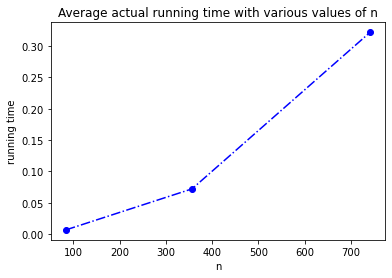

In [162]:
plotting(X_list, Y_list)

In [163]:
print(X_list)

[83.5, 356.5, 741.6666666666666]


In [164]:
print(Y_list)

[0.006965756416320801, 0.07230186462402344, 0.3216704527537028]
